# **Tabular Fake News Detection**

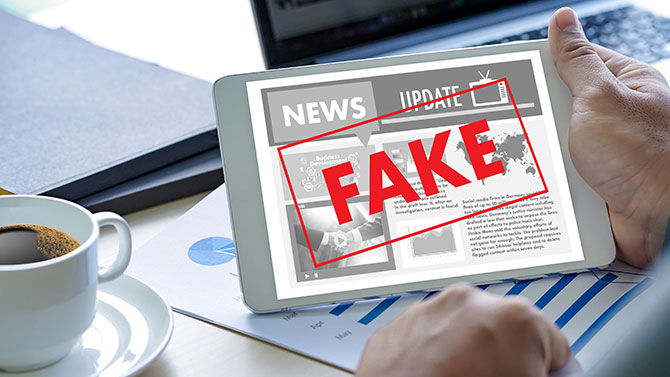

## **Problem Description**

The advent of digital platforms in the 21st century has made information easily accessible to people across the globe. However, this convenience has also led to the emergence of fake news, which can spread rumors and deceive the public. Detecting fake news is crucial for news or media organizations to maintain their credibility as a reliable source of information.
In this scenario, Data Scientist who works in News's Data Analytics division, their primary responsibility is to develop a highly accurate Machine Learning model that can effectively identify fake news articles from a compiled numerical dataset.

## **Objective**

The objective is to create a machine learning model that can identify fake news articles. However, instead of relying on the text of these articles, we will use a tabular dataset that includes metadata-level information about each article. This dataset will contain both genuine and fake news articles. The machine learning model will be responsible for accurately distinguishing between the real news articles and the fake ones based on parameters such as word count, average word length, number of sentences, and number of unique words.

## **Reading the Dataset**

In [1]:
# Importing the required libraries

# Importing library for data manipulation and analysis
import pandas as pd

# Library for statistical data visualization
import seaborn as sns

# Library for creating visualizations
import matplotlib.pyplot as plt

# Importing the RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

# Library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

 # Library for evaluating model accuracy
from sklearn.metrics import accuracy_score , f1_score, confusion_matrix

In [2]:
#Loading the dataset
df = pd.read_csv("/kaggle/input/fake-news-detection-data/Fake News Detection Dataset.csv")

In [3]:
#Lets see the first 10 rows of the dataset
df.head(10)

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1
5,3159,39,5,16,4.582874,1
6,7232,11,4,21,5.756046,1
7,7509,11,5,21,4.502690,1
8,1509,11,6,24,3.943672,1
9,1657,11,8,19,5.419068,1


In [4]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   int64  
 1   Word_Count           4500 non-null   int64  
 2   Number_of_Sentence   4500 non-null   int64  
 3   Unique_Words         4500 non-null   int64  
 4   Average_Word_Length  4500 non-null   float64
 5   Label                4500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 211.1 KB


- The data types of the columns vary. Five of the columns are of the int64 data type, which is typically used for integer values. However, the "Average_Word_Length" column is of the only float64 data type, suggesting that it contains decimal values.

- The "Non-Null Count" indicates that all 6 columns have 4500 non-null entries. **So there are no missing values in any of the columns.**

## **Summary Statistics**

In [5]:
#Description of dataset
df.describe()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,5469.140000,53.934000,8.934667,24.943333,4.968105,0.329556
std,2599.193059,24.872743,3.407847,11.540708,1.152394,0.470104
min,1002.000000,10.000000,4.000000,5.000000,3.000385,0.000000
25%,3228.750000,35.000000,6.000000,17.000000,3.980553,0.000000
50%,5449.500000,52.000000,9.000000,22.000000,4.906200,0.000000
75%,7706.750000,75.000000,12.000000,33.000000,5.996111,1.000000
max,9999.000000,100.000000,15.000000,50.000000,6.999799,1.000000


- The mean of "Word_Count" is 53.934, and "Number_of_sentence" is 8.93.

- The median (50%) of "Unique_Words" is 22, indicating that half of the data points have unique word counts below this value.

- The maximum Number_of_sentence is 15.

- The maximum count of unique words in a sentence is 50. This means that there is a sentence with a vocabulary of 50 distinct words.



## **Exploratory Data Analysis (EDA)**

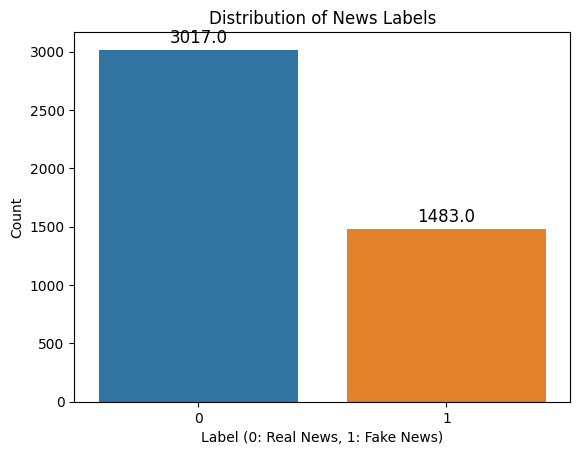

In [6]:
# Plotting the distribution of labels
ax = sns.countplot(x='Label', data=df)

# Adding labels and title
plt.xlabel('Label (0: Real News, 1: Fake News)')
plt.ylabel('Count')
plt.title('Distribution of News Labels')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

**The dataset consists of 3017 instances of Real News (Label 0) and 1483 instances of Fake News (Label 1).** This indicates an imbalance in the classes, where the number of real news instances is significantly higher than the number of fake news instances.

This could potentially affect the performance of a machine learning model, as it may be biased towards accurately classifying news as real due to the larger number of instances in that class.

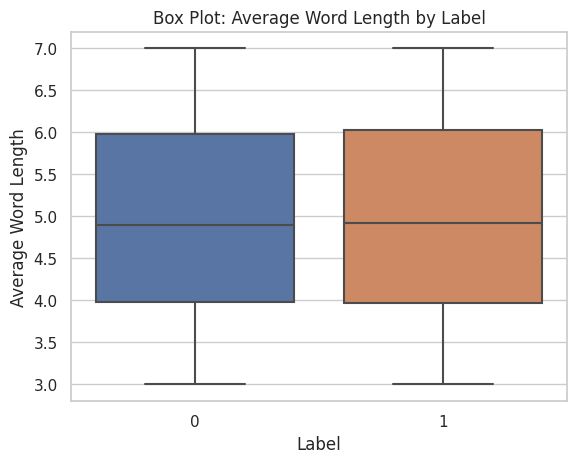

In [7]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create a bar plot
sns.boxplot(x="Label", y="Average_Word_Length", data=df)
plt.title("Box Plot: Average Word Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Word Length")
plt.show()

From this plot, **The average word length variable is similarly distributed in real and fake news.**

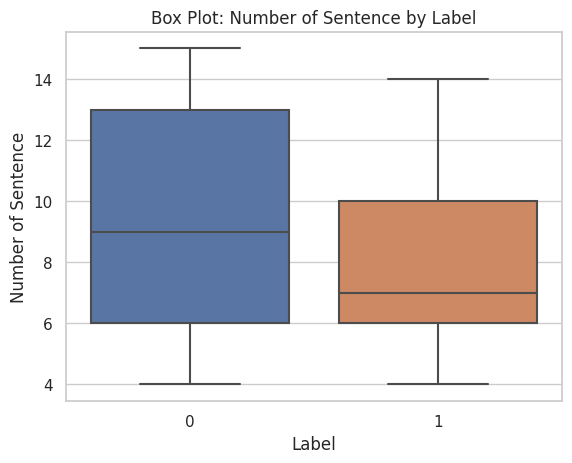

In [8]:
sns.boxplot(x="Label", y="Number_of_Sentence", data=df)
plt.title("Box Plot: Number of Sentence by Label")
plt.xlabel("Label")
plt.ylabel("Number of Sentence")
plt.show()

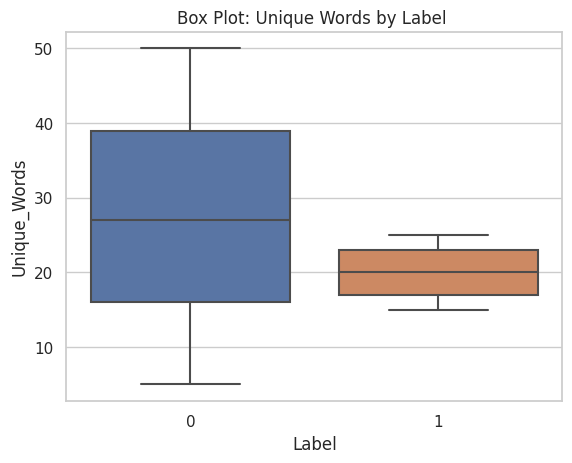

In [9]:
sns.boxplot(x="Label", y="Unique_Words", data=df)
plt.title("Box Plot: Unique Words by Label ")
plt.xlabel("Label")
plt.ylabel("Unique_Words")
plt.show()

- On average, real news articles tend to have a higher number of unique words compared to fake news articles - an insight that could be important to keep track of.

- The minimum number of unique words is less than 10 for real news and 15 for fake news. The maximum number of unique words is 50 for real news and 25 for fake news. **This indicates that real news articles can have a larger variety in the number of unique words compared to fake news articles.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


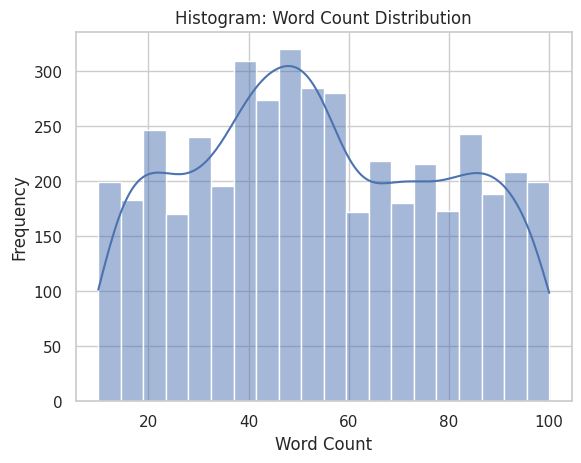

In [10]:
# Create a histogram
sns.histplot(data=df, x="Word_Count", bins=20, kde=True)
plt.title("Histogram: Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


- Upon analyzing the histogram, it appears that most articles have a word count that falls between the range of 30 to 60 words. This specific range is responsible for the highest frequency of articles.

- However, there are some articles whose word counts deviate from this expected range. The histogram's "tails" on both ends indicate that articles with very low or very high word counts are contributing to the overall dispersion.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

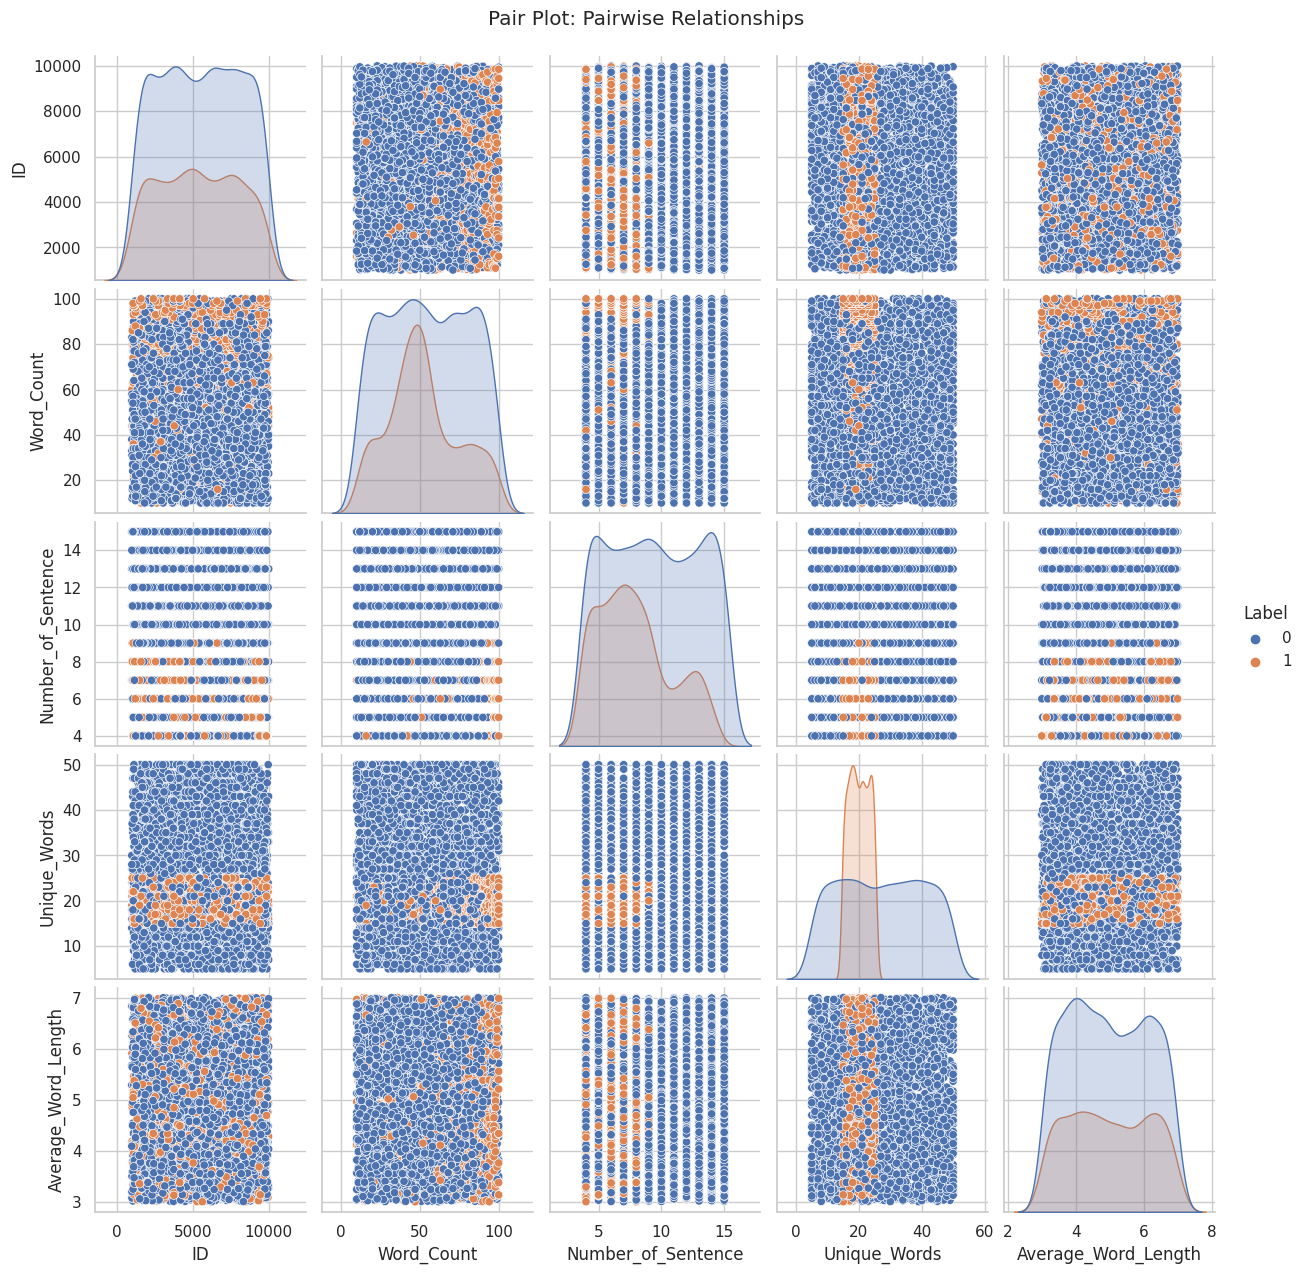

In [11]:
sns.pairplot(df, hue="Label")
plt.suptitle("Pair Plot: Pairwise Relationships", y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


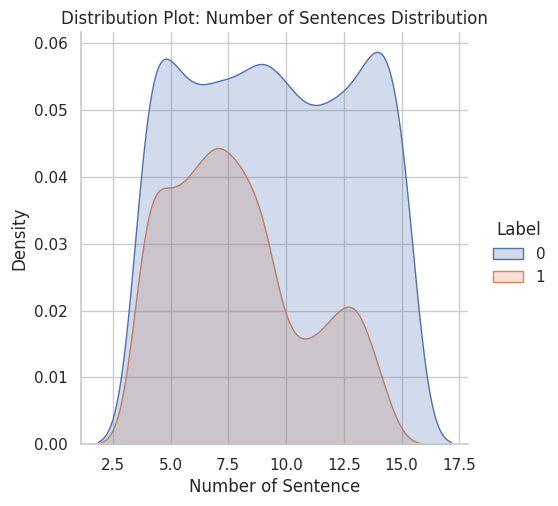

In [12]:
# Create a distribution plot
sns.displot(df, x="Number_of_Sentence", hue="Label", kind="kde", fill=True)
plt.title("Distribution Plot: Number of Sentences Distribution")
plt.xlabel("Number of Sentence")
plt.ylabel("Density")
plt.show()

-  **It has been observed that both real news (Label 0) and fake news (Label 1) exhibit three separate peaks in the KDE curves.** This implies that there are three distinct modes or clusters within the distribution of sentence lengths for each category. It can be inferred that the articles in both categories are naturally divided into these three specific groups based on their sentence lengths.

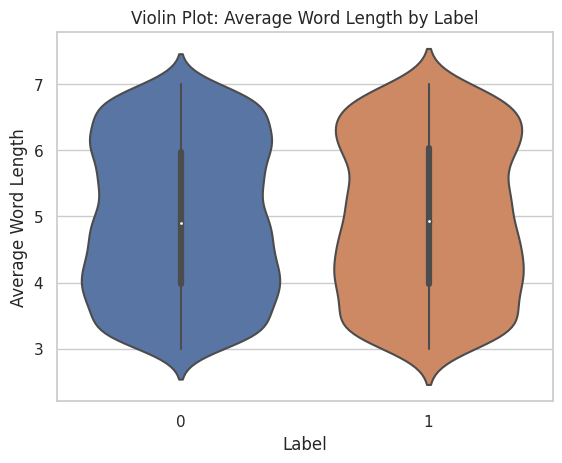

In [13]:
# Create a violin plot
sns.violinplot(x="Label", y="Average_Word_Length", data=df)
plt.title("Violin Plot: Average Word Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Word Length")
plt.show()

- The plot's width depicts how dense the data is at various average word lengths. A wider portion indicates higher density, while a narrower portion indicates lower density. 

- Similarly, the violin plot displays changes in density within specific ranges of average word lengths. These changes could suggest certain patterns or trends in writing style for both genuine and fake news articles.

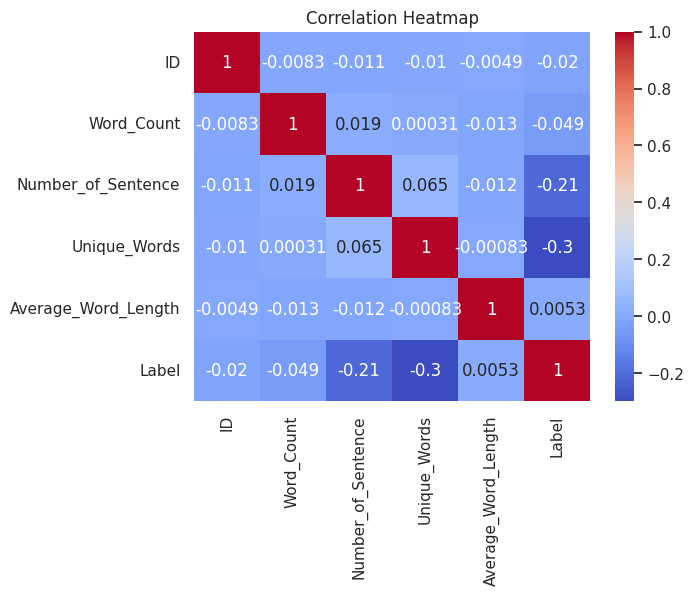

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Insights from the Correlation Heatmap**

- **The correlation between "Word_Count" and the "Label" is approximately -0.0489.**  The data shows that there is a weak negative correlation between the number of words in an article and whether it is real or fake news. 

- Similarly,**The correlation between "Number_of_Sentence" and the "Label" is approximately -0.21.**  There is a moderate negative correlation between the number of sentences in an article and whether it is a fake news article or not. 

- **The correlation between "Unique_Words" and the "Label" is approximately -0.3.** The correlation between unique words and the label is also moderate and negative, suggesting that fake news articles tend to use fewer unique words compared to real news articles. This could be an important feature for classification.

- However, most of the other pairs of variables show no or very low correlation, indicating no strong linear relationships between them.

## **Model Building**

To build a Machine Learning model with a Random Forest algorithm, we need to follow the below steps:

1. The first step is to split dataset into training and testing subsets. This is important to train the model on one portion of the data and evaluate its performance on another. A common split ratio is around 70-80% for training and 20-30% for testing. This prevents overfitting and helps assess the model's generalization ability.

2. The second step is to create an instance of the RandomForestClassifier class. Set hyperparameters like the number of trees in the forest, the max depth of trees, and other relevant parameters.

3. Next, fit the RandomForestClassifier to the training data using the `.fit()` method. This step involves building a collection of decision trees through the random selection of features and observations.

4. Finally, evaluate the model's performance on the testing data using appropriate metrics like accuracy, precision, recall, F1-score, etc. This step helps to understand how well the model generalizes to unseen data.

In [15]:
# Separate features (X) and target variable (y)
X = df.drop(['Label',"ID"], axis=1)
y = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [16]:
# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators =150,max_depth =5,random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [17]:
# Make predictions on the train data using the trained model
y_train_pred = rf_model.predict(X_train)

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8903703703703704


The Random Forest model has shown promising results with an accuracy score of 89.04% in predicting the correct labels on the test data. This indicates that the model is making precise predictions for a significant portion of the test dataset.

The high accuracy score suggests that the model is effectively capturing vital patterns and relationships present in the training data. It demonstrates a good level of generalization to unseen data, which is a fundamental goal of machine learning.

In [19]:
# Calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8593155893536121


"The F1 score is a metric that evaluates the performance of a model by considering both precision and recall. It provides a balanced measure of the model's ability to make accurate positive predictions (precision) and identify actual positive instances (recall). An **F1 score of 0.859 indicates that the model is achieving a good balance between precision and recall, which is a positive sign**.

<Axes: >

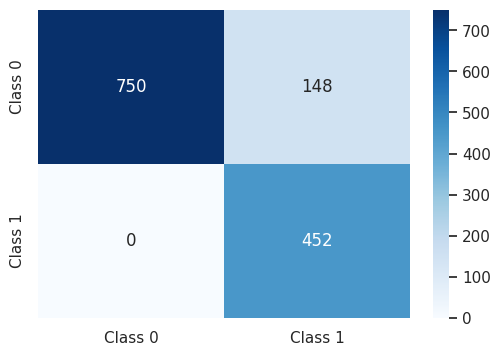

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

## **Insights**

The model accurately predicted 749 instances as real news (Label 0), which means these were articles that were genuinely real, and the model correctly identified them. However, there were 149 instances where the model mistakenly predicted fake news (Label 1), but they were genuinely real news (Label 0). These are instances where the model made an incorrect prediction of fake news.

The model correctly predicted fake news (Label 1) in 452 instances. These were articles that were actually fake, and the model accurately identified them. Interestingly, there were no instances where the model predicted real news (Label 0), but they were actually fake news (Label 1). This means the model did not miss any fake news articles in this particular evaluation.

Overall, the model's performance is quite good, with a high proportion of true positives and true negatives compared to false positives. This suggests that the model is making accurate predictions and has a balanced classification performance.



**Overall, the model's performance is quite good, with a high proportion of true positives and true negatives compared to false positives.** This suggests that the model is making accurate predictions and has a balanced classification performance.

